<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Boston_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1) handle nan values
# 2) remove outliers
# 3) one hot encoding if needed
# 4) train test split
# 5) use neural networks to predict the column "MEDV"

import pandas as pd

data = pd.read_csv('HousingData.csv')

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# check for missing values
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
# Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Drop irrelevant column
data = data.drop(['AGE'],axis=1)

In [ ]:
# fill the nan values
from sklearn.impute import SimpleImputer
import numpy as np
# fill the rows with NA value
num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# For Numerical Columns
num_col = data.loc[:,data.dtypes!=object].columns
num_mean.fit(data[num_col])

data[num_col] = num_mean.transform(data[num_col])

data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# Splitting Features and Label

# Label Data
Y = data['MEDV']

# Features Data
X = data.drop(['MEDV'],axis=1)
features_cols = X.columns

(506, 12)

In [ ]:
# Data Preprocessing (Scaling)

from sklearn.preprocessing import StandardScaler

X_values = X[features_cols].values
scaler = StandardScaler()
scaler.fit(X_values)
print(scaler.mean_)

X_values = scaler.transform(X_values)

# Assigning the values back to their column name
X = pd.DataFrame(data=X_values, columns=features_cols)

[-2.80846931e-17 -7.19670261e-17 -5.61693862e-17 -4.21270397e-17
 -1.96592852e-16 -1.08828186e-16 -8.42540793e-17 -1.12338772e-16
  0.00000000e+00 -4.21270397e-16 -7.44244367e-16 -1.40423466e-16]


(506, 12)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
318,-0.375979,-0.489639,-0.176912,-0.279851,-0.092387,0.138713,-0.124805,-0.637962,-0.619094,-0.025677,0.422522,-0.336211
255,-0.418913,3.004057,-1.112282,-0.279851,-1.405414,-0.582165,2.579000,-0.982843,-0.553762,-0.950402,0.422193,-0.494651
90,-0.417582,-0.489639,-1.146648,-0.279851,-0.567496,0.188576,-0.334062,-0.867883,-0.821030,-0.303094,0.389300,-0.557457
275,-0.411819,1.257209,-0.698388,-0.279851,-0.930305,0.811152,0.224497,-0.637962,-0.916058,-0.395567,0.441052,-1.389623
198,-0.418655,3.004057,-1.429052,-0.279851,-1.301754,1.409508,1.670427,-0.867883,-0.470612,-2.707379,0.389519,-0.870054
...,...,...,...,...,...,...,...,...,...,...,...,...
130,-0.383237,-0.489639,1.614634,-0.279851,0.598679,0.246987,-0.796977,-0.637962,0.170831,1.268938,0.420658,-0.016477
308,-0.365325,-0.489639,-0.176912,-0.279851,-0.092387,0.499151,-0.227009,-0.637962,-0.619094,-0.025677,0.441052,-1.166951
472,-0.005059,-0.489639,1.048332,-0.279851,0.218592,0.217069,-0.427139,1.661245,1.530926,0.806576,0.402348,0.234744
402,0.700903,-0.489639,1.048332,-0.279851,1.194724,0.170055,-1.024916,1.661245,1.530926,0.806576,0.213103,1.084039


In [ ]:
# Implementing Neural Network
model = Sequential()

# Input Layer with input size 12
model.add(Dense(64,input_shape=(12,),activation='relu'))

# Hidden Layer
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

# Output Layer
model.add(Dense(1,activation='linear'))

In [ ]:
# compile the model
model.compile(loss='mean_squared_error',optimizer='adam')

# training the model
model.fit(X_train.values,y_train.values,epochs=150,batch_size=10)

Epoch 1/150
41/41 [==============================] - 2s 5ms/step - loss: 530.9115
Epoch 2/150
41/41 [==============================] - 0s 5ms/step - loss: 248.7370
Epoch 3/150
41/41 [==============================] - 0s 4ms/step - loss: 40.0431
Epoch 4/150
41/41 [==============================] - 0s 5ms/step - loss: 24.0498
Epoch 5/150
41/41 [==============================] - 0s 5ms/step - loss: 20.9542
Epoch 6/150
41/41 [==============================] - 0s 4ms/step - loss: 18.8753
Epoch 7/150
41/41 [==============================] - 0s 4ms/step - loss: 17.8733
Epoch 8/150
41/41 [==============================] - 0s 5ms/step - loss: 16.9952
Epoch 9/150
41/41 [==============================] - 0s 5ms/step - loss: 16.1448
Epoch 10/150
41/41 [==============================] - 0s 4ms/step - loss: 15.2454
Epoch 11/150
41/41 [==============================] - 0s 4ms/step - loss: 14.6947
Epoch 12/150
41/41 [==============================] - 0s 7ms/step - loss: 14.2844
Epoch 13/150
41/41 [===

In [ ]:
predicted_lbls = model.predict(X_test.values)

4/4 [==============================] - 0s 3ms/step


In [ ]:
predicted_lbls

array([[36.108345 ],
       [19.357798 ],
       [19.156866 ],
       [38.254414 ],
       [14.322427 ],
       [15.84092  ],
       [17.507353 ],
       [21.031813 ],
       [15.268696 ],
       [19.288107 ],
       [21.578815 ],
       [21.23424  ],
       [21.374273 ],
       [20.724756 ],
       [20.699907 ],
       [35.929157 ],
       [13.158277 ],
       [32.897694 ],
       [12.736594 ],
       [21.589224 ],
       [24.921637 ],
       [26.682962 ],
       [13.579123 ],
       [21.540712 ],
       [32.97495  ],
       [22.37203  ],
       [30.939028 ],
       [23.762236 ],
       [17.865776 ],
       [30.482542 ],
       [15.443566 ],
       [34.86761  ],
       [20.140219 ],
       [23.642336 ],
       [24.229258 ],
       [29.751791 ],
       [41.696575 ],
       [15.432565 ],
       [23.210762 ],
       [26.929909 ],
       [21.790674 ],
       [17.345615 ],
       [32.513588 ],
       [20.786346 ],
       [17.50306  ],
       [19.994905 ],
       [26.300173 ],
       [15.12

In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
291,-0.413832,3.004057e+00,-9.165414e-01,-0.279851,-1.241285,1.230001,0.628275,-0.637962,-0.969512,0.344213,0.441052,-1.306835
469,1.108454,-4.896385e-01,1.048332e+00,-0.279851,0.218592,-0.814384,-0.461746,1.661245,1.530926,0.806576,0.441052,0.291839
151,-0.247801,-4.896385e-01,1.269474e+00,-0.279851,2.732346,-1.254603,-1.047449,-0.523001,-0.031105,-1.736418,-0.165277,0.080586
372,0.545297,-4.896385e-01,1.048332e+00,3.720376,0.978765,-0.583589,-1.267069,1.661245,1.530926,0.806576,-0.096421,-0.547465
428,0.439861,-4.896385e-01,1.048332e+00,-0.279851,1.073787,-0.130548,-0.883922,1.661245,1.530926,0.806576,-2.850120,1.256753
...,...,...,...,...,...,...,...,...,...,...,...,...
204,-0.420716,3.659125e+00,-1.255725e+00,-0.279851,-1.197230,2.492249,0.628893,-0.637962,-1.094237,-1.736418,0.371428,-1.403897
146,-0.170642,-7.757562e-17,1.269474e+00,-0.279851,2.732346,-0.935480,-1.083101,-0.523001,-0.031105,-1.736418,-2.054765,0.561615
35,-0.415552,-4.896385e-01,-7.656272e-01,-0.279851,-0.481112,-0.500959,-0.206663,-0.523001,-0.767576,0.344213,0.441052,0.000000
173,-0.412318,-4.896385e-01,-2.654233e-16,-0.279851,-0.386091,0.187151,-0.546077,-0.523001,-0.666608,-0.857929,0.425702,-0.524627


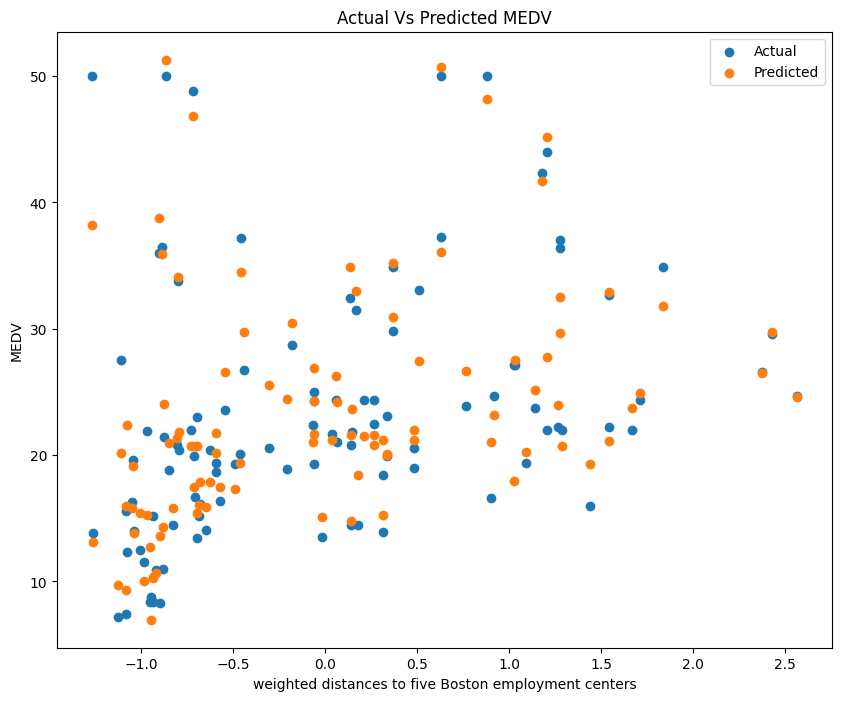

In [ ]:
# Visuzlization
# Actual Labels vs Predicted Labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X_test.DIS,y_test,label="Actual")
plt.scatter(X_test.DIS,predicted_lbls,label="Predicted")

plt.xlabel('weighted distances to five Boston employment centers')
plt.ylabel("MEDV")
plt.title("Actual Vs Predicted MEDV")
plt.legend()
plt.show()

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# r2_score
print(f"r2_score: {r2_score(y_test,predicted_lbls)}")

# mean squared error
print(f"mean squared error: {mean_squared_error(y_test,predicted_lbls)}")

# root mean squared error
print(f"root mean squared error: {np.sqrt(mean_squared_error(y_test,predicted_lbls))}")

# mean absolute error
print(f"mean absolute error: {mean_absolute_error(y_test,predicted_lbls)}")

# explained variance score
print(f"explained variance score: {explained_variance_score(y_test,predicted_lbls)}")

r2_score: 0.8977299557237901
mean squared error: 9.919664366102733
root mean squared error: 3.1495498672195574
mean absolute error: 2.3187309452131686
explained variance score: 0.8988554610581982
